In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2009_10 = pd.read_csv("/content/drive/MyDrive/Customer_Transaction(2009-2010).csv",encoding='ISO-8859-1')
df_2010_11 = pd.read_csv("/content/drive/MyDrive/Customer_Transaction(2010-2011).csv",encoding='ISO-8859-1')

In [3]:
# Merging the dataset from 2009-2011
df_merged = pd.concat([df_2009_10,df_2010_11])
df_merged.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [4]:
# Remove the cancelled transactions (Invoice that starts with 'c')
df_merged = df_merged[~df_merged['Invoice'].str.contains('C')]

In [5]:
# Check missing value count
df_merged.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    242257
Country             0
dtype: int64

In [6]:
# Evidently analysis isn't possible for Customers with no Customer ID (blanks/missing)
df_merged = df_merged.dropna(subset=['Customer ID'])

In [7]:
# Convert InvoiceDate to DateTime format
df_merged['InvoiceDate'] = pd.to_datetime(df_merged['InvoiceDate'])

Transformation & Cleaning steps done above:


*   Combined 2009-2010 & 2010-2011 dataframe.
*   Remove transactions that were cancelled (Invoice that starts with 'C')
*   Dropped transactions where the Customer ID was missing.
*   Comvert InvoiceDate to datetime format

In [8]:
# Create 'date', 'month', 'week', and 'time' columns
df_merged['date'] = df_merged['InvoiceDate'].dt.strftime('%m/%d/%Y')
df_merged['month'] = df_merged['InvoiceDate'].dt.strftime('%B')
df_merged['week'] = df_merged['InvoiceDate'].dt.strftime('%A')
df_merged['time'] = df_merged['InvoiceDate'].dt.strftime('%H')

In [9]:
df_merged.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,month,week,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12/01/2009,December,Tuesday,07
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12/01/2009,December,Tuesday,07
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12/01/2009,December,Tuesday,07
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12/01/2009,December,Tuesday,07
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12/01/2009,December,Tuesday,07


In [10]:
# Calculate the total price
df_merged['TotalPrice'] = df_merged['Quantity'] * df_merged['Price']

In [11]:
max_date = df_merged['InvoiceDate'].max() # For RFM calculation
df_merged['DaysSincePurchase'] = (max_date - df_merged['InvoiceDate']).dt.days

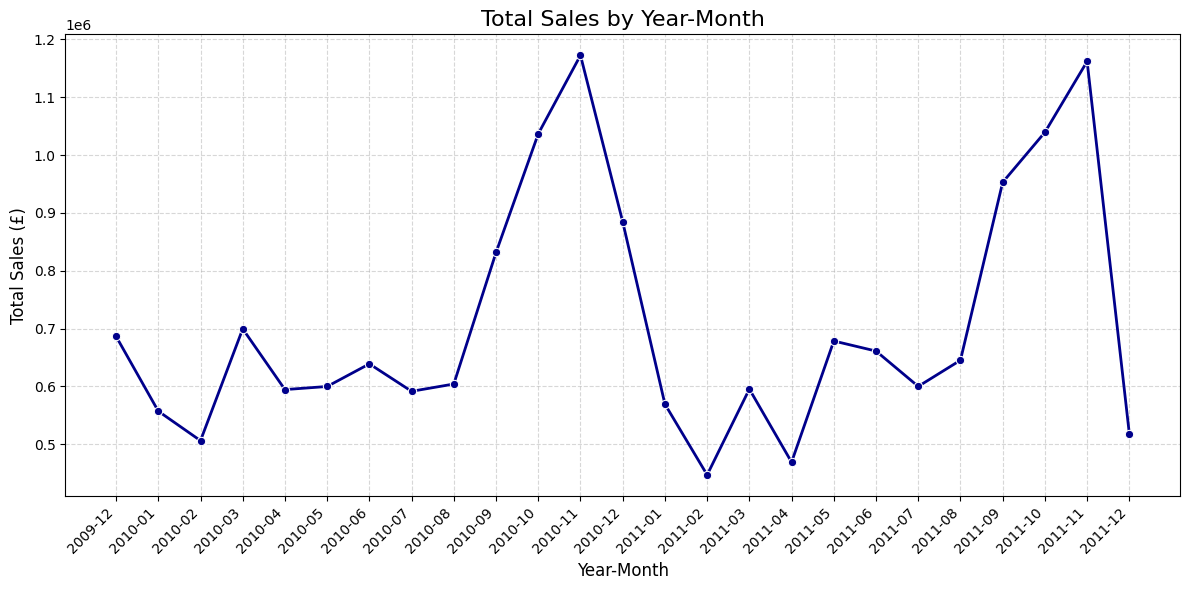

In [12]:
df_merged['YearMonth'] = df_merged['InvoiceDate'].dt.strftime('%Y-%m')

# Calculate the total sales by year and month
df_months = df_merged.groupby('YearMonth').agg({'TotalPrice': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='YearMonth', y='TotalPrice', marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Year-Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


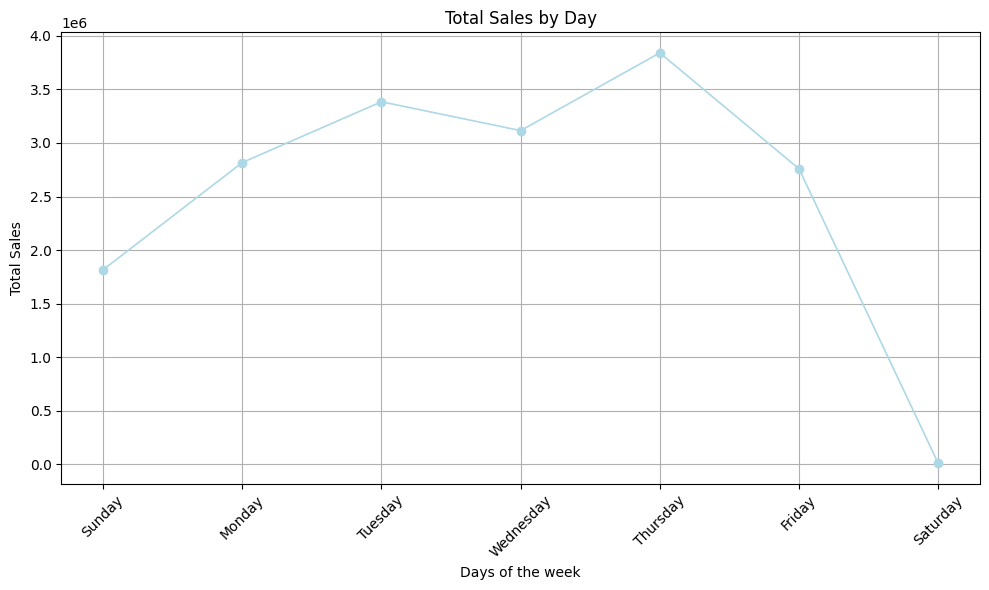

In [13]:
# Calculating total sales on a daily basis
daywise = df_merged.groupby('week').agg({'TotalPrice': 'sum'}).reset_index()

# Reordering the table according to weekdays
daywise['week'] = pd.Categorical(daywise['week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('week')

plt.figure(figsize=(10, 6))
plt.plot(daywise['week'], daywise['TotalPrice'], marker='o', color='lightblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

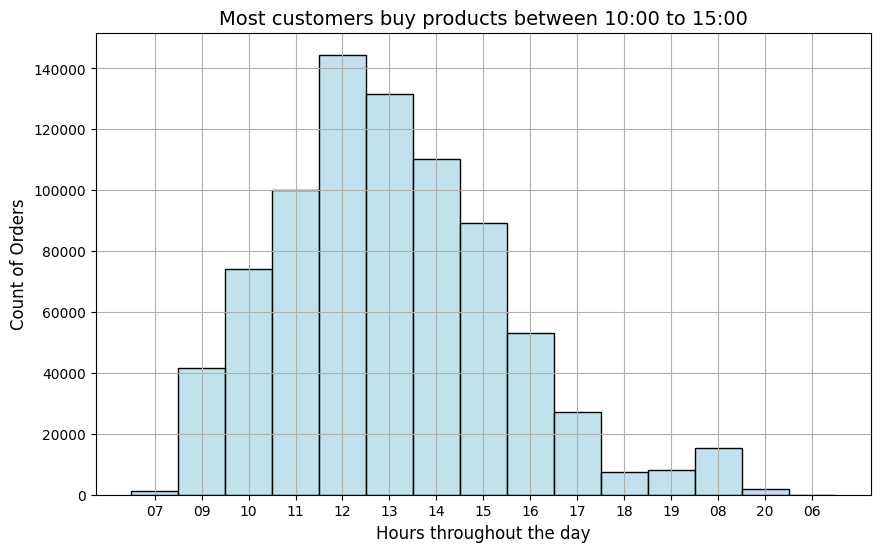

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='time', bins=24, color='lightblue', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

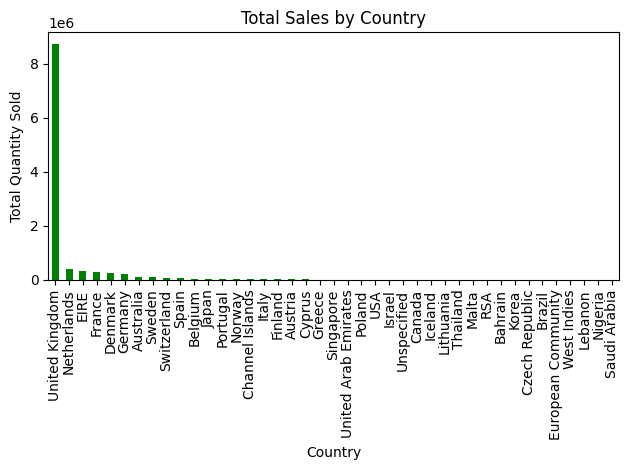

In [15]:
country_sales = df_merged.groupby('Country').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)

# Create a bar plot for sales by country
plt.figure(figsize=(12, 8))
country_sales.plot(kind='bar', legend=None, color='green')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

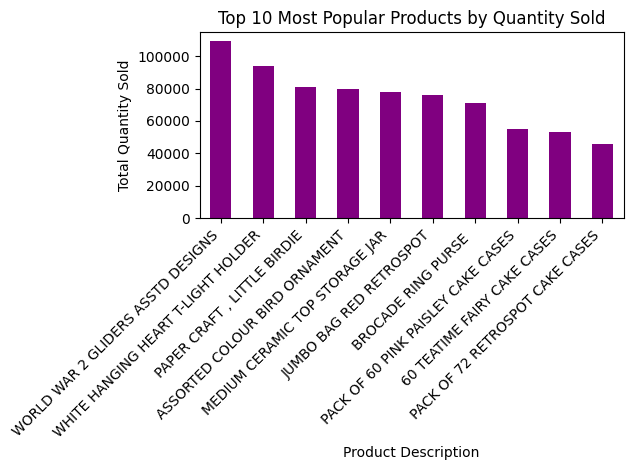

In [16]:
popular_products = df_merged.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)

# Create a bar plot for the top 10 most popular products
plt.figure(figsize=(12, 8))
popular_products.plot(kind='bar', legend=None, color='purple')
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

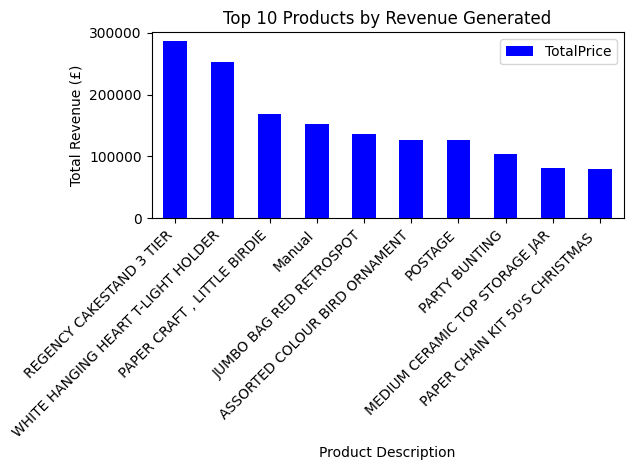

In [17]:
revenue_products = df_merged.groupby('Description').agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).head(10)

# Create a bar plot for the top 10 products by revenue
plt.figure(figsize=(12, 8))
revenue_products.plot(kind='bar', color='blue')
plt.title('Top 10 Products by Revenue Generated')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Recency**: **How recent was a customer's latest purchase?**
* In this case we're considering the lastest date of the dataset & the last purchase date of a specific Customer ID & calculating the recency wrt the lastest date

**Frequency: How often does a customer make purchases?**
* Counting the no of Invoice for each Customer ID

**Monetary: How much does a customer spend?**
* Total of all the transactions for each Customer ID i.e Sum of Quantity * Price

In [18]:
# Calculating thr RFM value for each customer (group by Customer ID)
rfm = df_merged.groupby('Customer ID').agg({
    'DaysSincePurchase': 'min',
    'Invoice': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'DaysSincePurchase': 'Recency',
                   'Invoice': 'Frequency',
                   'TotalPrice': 'Monetary'})

In [19]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,34,77556.46
12347.0,1,253,5633.32
12348.0,74,51,2019.40
12349.0,18,175,4428.69
12350.0,309,17,334.40


In [20]:
#Scoring the Recency, Frequency & Monetary metrics using tertiles.
rfm['R_Score'] = pd.qcut(rfm['Recency'], 3, labels=[3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 3, labels=[1, 2, 3])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3])

#Combining
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
12346.0,325,34,77556.46,1,2,3,123
12347.0,1,253,5633.32,3,3,3,333
12348.0,74,51,2019.40,2,2,3,223
12349.0,18,175,4428.69,3,3,3,333
12350.0,309,17,334.40,1,1,1,111


Segmentations of Customer based on RFM score:
* **Best Customers**: Bought most recently, more often & spends the most
* **Loyal Customers**: Buys more frequently
* **Big Spenders**: Spends the most
* **Almost Lost**: Haven't purchased for sometime but used to purchase frequently & spend most
* **Lost Customers**: Haven't purchased for a long time but used to purchase frequently & spend most
* **Lost Cheap Customers**: Purchased long time ago, purchased few & spend very little

In [21]:
import itertools

def segment(row):
    rfm_score = row['RFM_Score']

    permutations = [''.join(p) for p in itertools.product('123', repeat=3)]

    if rfm_score == '333':
        return 'Best Customers'
    elif rfm_score == '111':
        return 'Lost Cheap Customers'
    elif rfm_score in [p for p in permutations if p.count('3') == 2]:
        return 'Best Customers'
    elif rfm_score in ['312']:
        return 'Best Customers'
    elif rfm_score in [p for p in permutations if p.count('3') == 1 and '2' not in p]:
        if rfm_score in ['113', '131']:
            return 'Lost Customers'
        else:
            return 'Big Spenders'
    elif rfm_score in [p for p in permutations if p.count('3') == 1 and '2' in p]:
        if rfm_score == '213':
            return 'Big Spenders'
        else:
            return 'Loyal Customers'
    elif rfm_score == '233':
        return 'Almost Lost'
    elif rfm_score == '133':
        return 'Lost Customers'
    elif rfm_score in [p for p in permutations if '2' in p and '3' not in p]:
        if rfm_score in ['112', '121', '122']:
            return 'Lost Customers'
        else:
            return 'Almost Lost'
    elif rfm_score in [p for p in permutations if '2' not in p and '3' not in p]:
        return 'Lost Customers'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment, axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
Customer ID,,,,,,,,
12346.0,325,34,77556.46,1,2,3,123,Loyal Customers
12347.0,1,253,5633.32,3,3,3,333,Best Customers
12348.0,74,51,2019.40,2,2,3,223,Loyal Customers
12349.0,18,175,4428.69,3,3,3,333,Best Customers
12350.0,309,17,334.40,1,1,1,111,Lost Cheap Customers


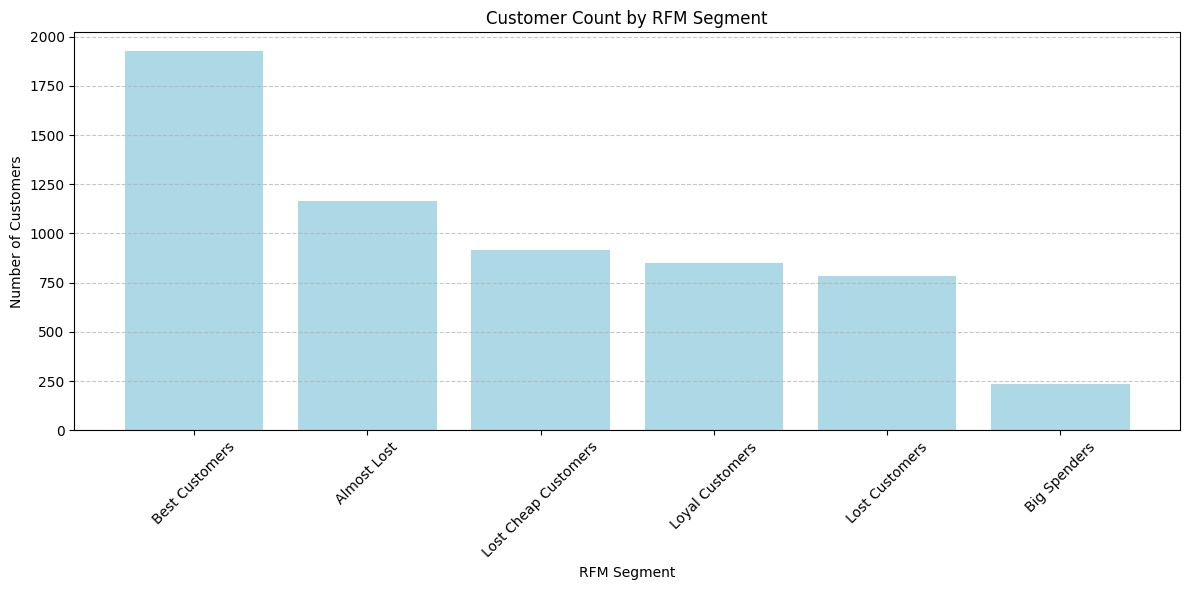

In [22]:
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(segment_counts.index, segment_counts.values, color='lightblue')
plt.title('Customer Count by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Conclusion**: Leveraging RFM-based customer segmentation for marketing campaigns can significantly reduce costs by targeting efforts more effectively. This approach captures customer attention more efficiently, encourages increased spending, and thereby enhances overall revenue. Targeted marketing not only streamlines expenditure but also solidifies customer relationships, which is a cornerstone of enduring business performance.